In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

df=pd.read_csv("../data/Diamonds/diamonds.csv.bz2")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
a=np.array([1,2,3,4,5,6,7,8,9,10,11,12])

In [4]:
print(a.reshape(-1,1))

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]


#### Lineare Regression, wir bestimmen parameter a und b bei y=ax+b

<AxesSubplot:xlabel='carat', ylabel='price'>

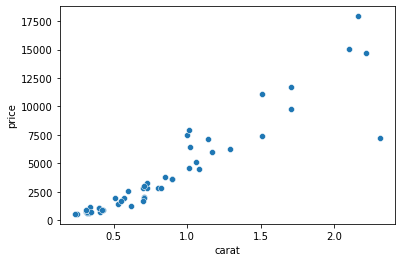

In [6]:
sns.scatterplot(x="carat", y ="price", data= df.sample(50))

In [7]:
from sklearn.linear_model import LinearRegression

In [10]:
model= LinearRegression()
model.fit?
#model.fit(X, y, sample_weight=None)
#X : {array-like, sparse matrix} of shape (n_samples, n_features)
#    Training data
#
#y : array-like of shape (n_samples,) or (n_samples, n_targets)
#    Target values. Will be cast to X's dtype if necessary

xs=df["carat"].to_numpy().reshape(-1,1) 

In [11]:
print(xs.shape)

(53940, 1)


In [12]:
ys=df["price"].to_numpy()

In [13]:
print(ys.shape)

(53940,)


In [14]:
### shape ok, model can be fited
model.fit(xs,ys)

LinearRegression()

In [15]:
print(model.coef_) # is the a
print(model.intercept_) #is the b

[7756.42561797]
-2256.3605800453984


In [17]:
model.predict([
    [10],[1]
])

array([75307.89559964,  5500.06503792])

<AxesSubplot:xlabel='carat', ylabel='price'>

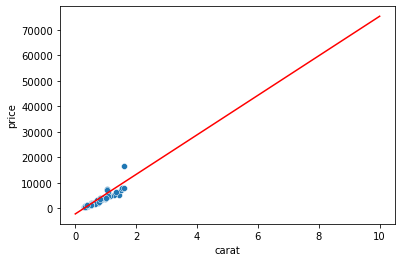

In [20]:
x_pred=np.array([10,0])
y_pred=model.predict(x_pred.reshape(-1,1))
###ploting
ax= sns.lineplot(x=x_pred,y=y_pred, color="red") ###safe line plot into a variable
sns.scatterplot(x="carat", y="price", data=df.sample(50), ax=ax )#ax is the paramter and second ax our variable

In [22]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Vorhersage mit mehreren features

In [23]:

X_train=df[["carat", "x"]]
y_train=df["price"]

print(X_train.shape)

(53940, 2)


In [34]:
y_train

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
print(model.coef_)
print(model.intercept_)

[10125.98767084 -1026.85685415]
1737.9497379839036


## Bestimtheitsmaß R2 Score

In [ ]:
Wert 1- Modell beschreibt die Dtaen perfekt
Wert 0 beschreibt daten geanuso wie durschnit
Wert unter 0 - es ist noch schlechter als der Durschnitt

In [41]:
from sklearn.metrics import r2_score
df=pd.read_csv("../data/Diamonds/diamonds.csv.bz2")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
xs=df["carat"].to_numpy().reshape(-1,1)
ys=df["price"]

model=LinearRegression()
model.fit(xs,ys)

y_pred=model.predict(xs)

In [43]:
r2_score(ys, y_pred)

0.8493305264354858

In [44]:
model.score(xs,ys)

0.8493305264354858

## Train/Test

In [45]:
df=pd.read_csv("../data/Diamonds/diamonds.csv.bz2")

df_train= df.iloc[:40000]
df_test=df.iloc[40000:]

X_train=df_train["carat"].to_numpy().reshape(-1,1)
y_train=df_train["price"]

model=LinearRegression()
model.fit(X_train,y_train)

X_test=df_test["carat"].to_numpy().reshape(-1,1)
y_test=df_test["price"]

In [46]:
print(model.score(X_test,y_test))

-1.051723909230562


In [47]:
##-1 bedeutet dass das MOdell überhaupt nicht gut ist
##warum hat es nicht geklappt???
##df train ist aufsteigend sortiert!!! zuerst bei ilog wurden die biligen diamenten und nachher die teuren
## daher müssen wir unseren datensatz schuffeln df.sample(frac=1)
## iloc ist ok loc wurde trotzdem auf die indizien zugreifen

In [49]:
df=pd.read_csv("../data/Diamonds/diamonds.csv.bz2")
df.sample(frac=1) #<-----------------------------------------mix 
df_train= df.iloc[:40000]
df_test=df.iloc[40000:]

X_train=df_train["carat"].to_numpy().reshape(-1,1)
y_train=df_train["price"]

model=LinearRegression()
model.fit(X_train,y_train)

X_test=df_test["carat"].to_numpy().reshape(-1,1)
y_test=df_test["price"]
print(model.score(X_test,y_test))

-1.051723909230562


### Daten aufteilen mit sklearn

In [52]:
from sklearn.model_selection import train_test_split

train,test=train_test_split([1,2,3,4,5,6,7,8,9,10],train_size=0.75, random_state=42)
print(train)
print(test)

[7, 3, 5, 8, 10, 2, 6]
[9, 4, 1]


In [53]:
X=df[["carat"]]
y=df["price"]

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [54]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [55]:
model.score(X_test, y_test)

0.8524141827723916